In [41]:
pip install -r requirements.txt


[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: C:\Users\ceeha\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [43]:
df = pd.read_csv('_data\dataset_2021-5-26-10-14.csv', sep = '\t', encoding = 'utf-8')
df

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.000000,0.0,2.421007e+05,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
1,1,16.052632,7.500000,224132.850000,0.0,4.960846e+06,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,missing,com de equipamentos de informatica,30/60/90,7134.489373,10,2018,0
2,0,13.250000,3.904762,513043.830000,0.0,1.586319e+05,1,1800.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,missing,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.640000,0.0,6.696442e+05,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,missing,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.000000,0.0,2.010560e+03,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117268,0,32.679779,16.582511,10470.620143,0.0,5.406733e+05,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de telefones e equip p/ comunicacoes,30/60/90,13290.156794,1,2019,1
117269,0,41.894875,16.649383,3349.884555,0.0,3.373146e+03,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,comercio,missing,4574.831977,4,2018,1
117270,0,132.525884,18.188413,893.233266,0.0,3.362163e+03,0,0.000000,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,com de moveis e estofados,missing,944.324251,1,2017,1
117271,0,26.930798,16.337212,43969.125732,0.0,1.388990e+04,2,622.546407,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de telefonia fixa,30/60/90/120,5295.273974,11,2019,1


# Tratamento dos valores numéricos

In [44]:
df.isna().sum() # verificação de valores faltantes (não há)
# não há missing values numéricos, somente categóricos

df['tipo_sociedade'].unique() # possui missing value
df['opcao_tributaria'].unique() # possui missing value

df['tipo_sociedade'].replace('missing', pd.NA, inplace=True)
df['opcao_tributaria'].replace('missing', pd.NA, inplace=True)

df.dropna(subset=['tipo_sociedade'], inplace=True)
df.dropna(subset=['opcao_tributaria'], inplace=True)

df.describe()

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,participacao_falencia_valor,dividas_vencidas_valor,dividas_vencidas_qtd,falencia_concordata_qtd,valor_total_pedido,month,year,default
count,98944.000000,98944.000000,98944.000000,9.894400e+04,9.894400e+04,9.894400e+04,98944.000000,9.894400e+04,98944.000000,9.894400e+04,98944.0,9.894400e+04,98944.000000,98944.000000,9.894400e+04,98944.000000,98944.000000,98944.000000
mean,0.144546,57.897323,17.344777,6.036386e+04,2.586939e+03,1.061482e+06,0.253446,2.051742e+03,0.018627,8.477372e+02,0.0,5.947877e+02,0.014594,0.000384,2.142276e+04,6.272053,2017.979524,0.180061
std,0.856765,62.281385,10.909881,5.605758e+05,8.677806e+04,7.980354e+06,11.560758,8.881498e+04,0.573659,4.824007e+04,0.0,9.168360e+04,0.415614,0.027712,5.211798e+05,3.198573,0.741265,0.384241
min,0.000000,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,-7.446899e+02,1.000000,2017.000000,0.000000
25%,0.000000,21.500000,11.820788,4.478600e+02,0.000000e+00,1.738157e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,2.083181e+03,3.000000,2017.000000,0.000000
50%,0.000000,40.250000,16.250000,3.774905e+03,0.000000e+00,7.015968e+04,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,3.808783e+03,7.000000,2018.000000,0.000000
75%,0.000000,72.500000,18.252526,1.588983e+04,0.000000e+00,2.622398e+05,0.000000,0.000000e+00,0.000000,0.000000e+00,0.0,0.000000e+00,0.000000,0.000000,8.719641e+03,9.000000,2019.000000,0.000000
max,26.000000,951.000000,90.000000,7.219759e+07,1.315050e+07,4.603203e+08,2324.000000,1.630546e+07,80.000000,8.390986e+06,0.0,1.972251e+07,40.000000,2.000000,1.503340e+08,12.000000,2019.000000,1.000000


array([[<AxesSubplot: title={'center': 'default_3months'}>,
        <AxesSubplot: title={'center': 'ioi_36months'}>,
        <AxesSubplot: title={'center': 'ioi_3months'}>,
        <AxesSubplot: title={'center': 'valor_por_vencer'}>],
       [<AxesSubplot: title={'center': 'valor_vencido'}>,
        <AxesSubplot: title={'center': 'valor_quitado'}>,
        <AxesSubplot: title={'center': 'quant_protestos'}>,
        <AxesSubplot: title={'center': 'valor_protestos'}>],
       [<AxesSubplot: title={'center': 'quant_acao_judicial'}>,
        <AxesSubplot: title={'center': 'acao_judicial_valor'}>,
        <AxesSubplot: title={'center': 'participacao_falencia_valor'}>,
        <AxesSubplot: title={'center': 'dividas_vencidas_valor'}>],
       [<AxesSubplot: title={'center': 'dividas_vencidas_qtd'}>,
        <AxesSubplot: title={'center': 'falencia_concordata_qtd'}>,
        <AxesSubplot: title={'center': 'valor_total_pedido'}>,
        <AxesSubplot: title={'center': 'month'}>],
       [<Axes

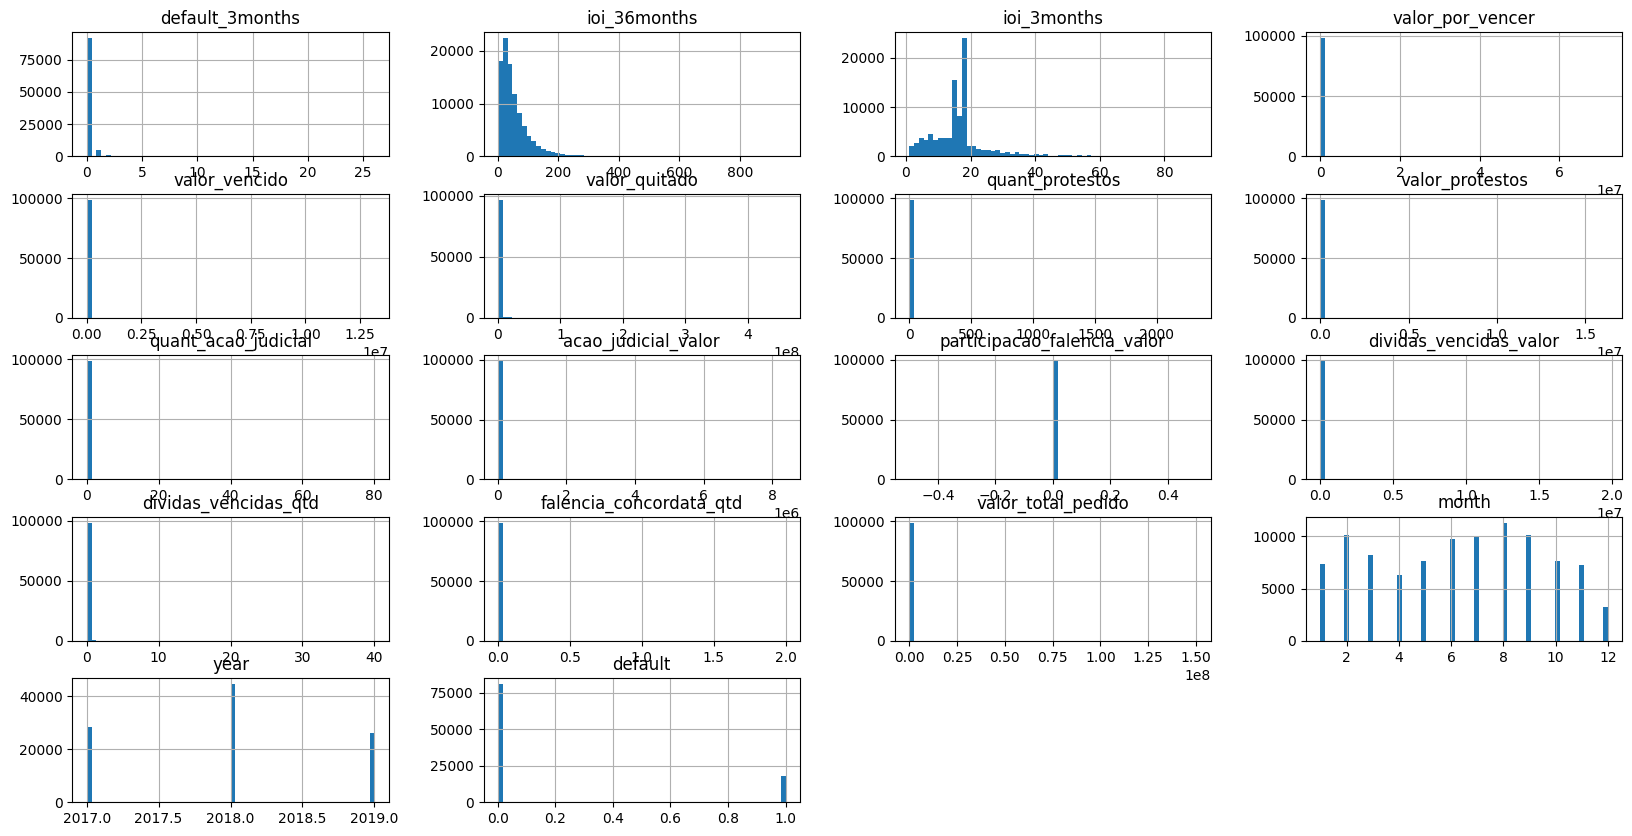

In [10]:
df.hist(bins=60, figsize=(20,10))

# Os histogramas de cada variável numérica são importantes para analisar as suas distribuições verificar a existência de outliers

#É possível observar que variáveis como ioi_36months, ioi_3months, month e year possuem distribuições mais uniformes que as demais variáveis
# No próximo kernel, analisarei as demais variáveis para verificar a existência de outliers

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
2587,11,3.951327,1.708333,7.422205e+04,9309.780000,1.873087e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,14/28/42/56/70,8858.174496,7,2019,0
4202,17,172.000000,18.264130,1.100559e+06,117341.620000,1.198179e+07,32,230780.0,0,0.0,...,0,0,sociedade anonima fechada,lucro real,loja de departamentos,missing,6134.117739,2,2019,1
4511,25,3.568000,2.256410,4.841883e+04,5168.050000,1.427076e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,missing,2706.742456,4,2018,0
4993,11,4.004525,1.736842,8.715682e+04,8665.440000,1.838146e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,14/28/42,2607.871486,6,2019,0
6794,11,3.948276,2.080000,6.960629e+04,13517.090000,2.020808e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,28/42/56,23594.273199,9,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116739,17,3.678740,2.404526,4.191377e+04,3554.449321,1.406368e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,28/42/56,1094.034106,3,2018,1
116805,22,3.597269,2.298220,4.678714e+04,5515.299175,1.422887e+06,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de telefones e equip p/ comunicacoes,14/28/42,1001.211314,4,2018,1
116883,11,8.100000,8.100000,7.758984e+03,0.000000,4.398930e+03,0,0.0,0,0.0,...,0,0,empresa individual respons limitada empresaria,simples nacional,com de eletrodomesticos,60/90/120/150/180/210,1380.511521,10,2018,1
116958,21,115.000000,1.000000,1.391114e+06,81174.640000,1.202904e+07,32,230780.0,0,0.0,...,0,0,sociedade anonima fechada,lucro real,loja de departamentos,missing,5390.627445,2,2019,1


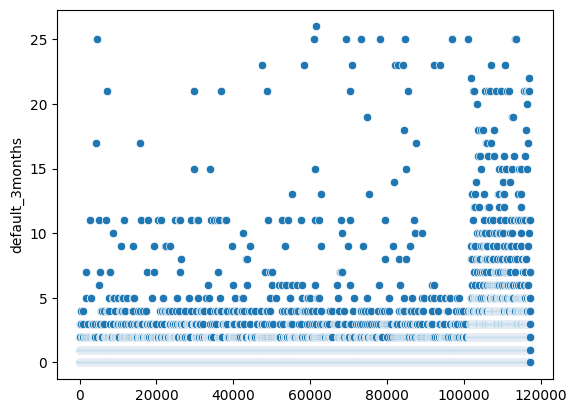

In [11]:
sns.scatterplot(x= df.index, y = "default_3months", data = df)
df[(df["default_3months"] > 10)]
# Observa-se que há poucos valores cujo default_3months é maior ou igual a 20 (utilizando df[df["default_3months"]>=20], verifica-se que há somente 44 linhas)

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
3097,0,50.000000,1.000000,17983.74,14138.40,800985.76,2324,9668391.0,18,4183436.0,...,3,0,sociedade empresaria limitada,lucro real,papelaria,21,2395.719476,2,2019,0
26688,0,23.500000,23.500000,373568.99,12940.86,2963076.31,420,1337738.0,0,0.0,...,27,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,7350.332749,3,2017,0
29698,0,18.333333,14.000000,35748.14,4551.06,3328063.00,466,1781012.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,11996.556979,4,2017,0
34421,0,18.333333,14.000000,35748.14,4551.06,3328063.00,466,1781012.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,11485.802418,4,2017,0
38781,0,58.000000,18.264130,20806.50,15286.81,2733344.86,684,1497707.0,0,0.0,...,0,2,empresa individual respons limitada empresaria,lucro real,com de maquinas e equip para escritorio,missing,2368.321417,11,2018,0
42207,0,27.000000,27.000000,364552.15,0.00,2962492.29,396,1322735.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,7037.351395,3,2017,0
42626,0,33.000000,66.000000,105560.77,0.00,1246330.14,198,374937.0,2,5959.0,...,1,0,sociedade anonima fechada,lucro real,farmacia e drogaria,80 dias,18673.203332,2,2019,0
56121,0,25.250000,3.631349,388967.45,22412.73,2906874.72,396,1322140.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,8448.945969,2,2017,0
58941,0,74.500000,18.258328,13384.26,14138.40,796711.36,2324,9668391.0,18,4183436.0,...,3,0,sociedade empresaria limitada,lucro real,papelaria,21,7462.495253,2,2019,0
71670,0,58.000000,18.258328,23858.73,15286.81,2774329.66,684,1497707.0,0,0.0,...,0,2,empresa individual respons limitada empresaria,lucro real,com de maquinas e equip para escritorio,28/42/56/70/84,22408.767576,3,2019,0


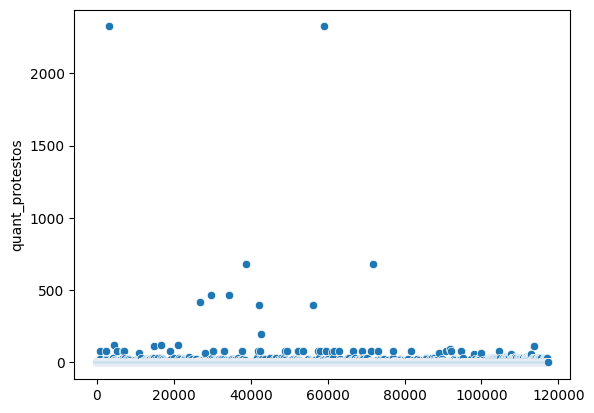

In [12]:
sns.scatterplot(x= df.index, y = "quant_protestos", data = df)
df[df["quant_protestos"]>=150] # verifica-se que há poucos pontos (9) em que a qtd de protestos é maior que 200

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
3097,0,50.000000,1.000000,1.798374e+04,1.413840e+04,8.009858e+05,2324,9.668391e+06,18,4.183436e+06,...,3,0,sociedade empresaria limitada,lucro real,papelaria,21,2.395719e+03,2,2019,0
4421,0,101.000000,16.000000,2.832012e+07,2.538136e+06,2.873013e+08,118,1.390334e+06,65,2.553463e+06,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,1.231850e+04,2,2019,0
10848,0,29.000000,15.333333,2.857562e+06,2.383750e+03,7.327542e+07,66,8.567720e+05,15,6.430800e+04,...,11,0,sociedade empresaria limitada,lucro real,"com atac-prod farmac, perfumaria, cosmeticos",missing,1.974782e+06,2,2019,1
14939,0,17.206897,20.000000,2.727217e+05,9.425690e+03,1.770871e+05,115,1.630546e+07,80,6.975410e+06,...,40,0,sociedade anonima fechada,lucro real,farmacia e drogaria,45 dias,5.428697e+04,6,2019,0
16586,0,101.000000,16.000000,2.774866e+07,2.047795e+06,2.872908e+08,118,1.390334e+06,65,2.553463e+06,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,5.796520e+03,2,2019,0
21185,0,101.000000,16.000000,2.774866e+07,2.047795e+06,2.872908e+08,118,1.390334e+06,65,2.553463e+06,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,6.160087e+03,2,2019,0
28132,0,5.736842,15.333333,1.322889e+06,1.450626e+04,7.129320e+07,66,8.371310e+05,10,6.430800e+04,...,12,0,sociedade empresaria limitada,lucro real,"com atac-prod farmac, perfumaria, cosmeticos",missing,1.644977e+05,11,2018,0
41729,0,15.760000,11.285714,3.850093e+04,0.000000e+00,7.117790e+03,29,8.702209e+06,14,9.436000e+03,...,5,0,sociedade anonima fechada,lucro real,farmacia e drogaria,90,2.319583e+03,3,2019,0
45092,0,17.130435,11.400000,3.850093e+04,0.000000e+00,7.117790e+03,29,8.702209e+06,14,9.436000e+03,...,5,0,sociedade anonima fechada,lucro real,farmacia e drogaria,90,5.396326e+03,3,2019,0
58941,0,74.500000,18.258328,1.338426e+04,1.413840e+04,7.967114e+05,2324,9.668391e+06,18,4.183436e+06,...,3,0,sociedade empresaria limitada,lucro real,papelaria,21,7.462495e+03,2,2019,0


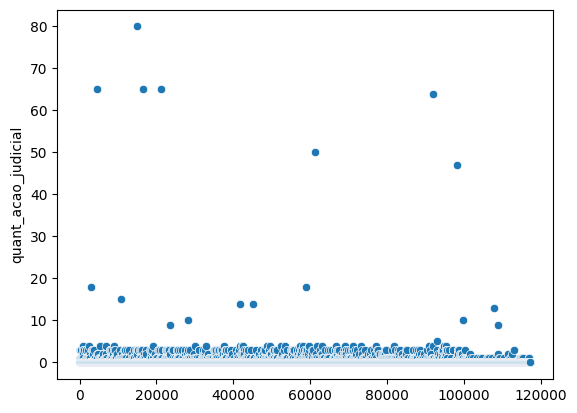

In [13]:
sns.scatterplot(x= df.index, y = "quant_acao_judicial", data = df)
df[df["quant_acao_judicial"]>=10] # verifica-se que há poucos pontos (9) em que a qtd de ações judiciais é maior que 20

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
4421,0,101.000000,16.000000,28320117.69,2538135.56,2.873013e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,12318.504809,2,2019,0
6942,0,37.125000,6.000000,627542.41,97603.85,4.876897e+07,82,430874.0,1,0.0,...,33,0,sociedade anonima fechada,lucro real,com atacad de generos alimenticios,30 dias,89149.716749,1,2019,0
14939,0,17.206897,20.000000,272721.66,9425.69,1.770871e+05,115,16305457.0,80,6975410.0,...,40,0,sociedade anonima fechada,lucro real,farmacia e drogaria,45 dias,54286.968785,6,2019,0
16586,0,101.000000,16.000000,27748657.73,2047795.08,2.872908e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,5796.520201,2,2019,0
21185,0,101.000000,16.000000,27748657.73,2047795.08,2.872908e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,6160.087013,2,2019,0
26688,0,23.500000,23.500000,373568.99,12940.86,2.963076e+06,420,1337738.0,0,0.0,...,27,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,7350.332749,3,2017,0
29698,0,18.333333,14.000000,35748.14,4551.06,3.328063e+06,466,1781012.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,11996.556979,4,2017,0
34421,0,18.333333,14.000000,35748.14,4551.06,3.328063e+06,466,1781012.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,11485.802418,4,2017,0
42207,0,27.000000,27.000000,364552.15,0.00,2.962492e+06,396,1322735.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,7037.351395,3,2017,0
56121,0,25.250000,3.631349,388967.45,22412.73,2.906875e+06,396,1322140.0,0,0.0,...,29,0,sociedade empresaria limitada,lucro real,supermercado e hipermercado,missing,8448.945969,2,2017,0


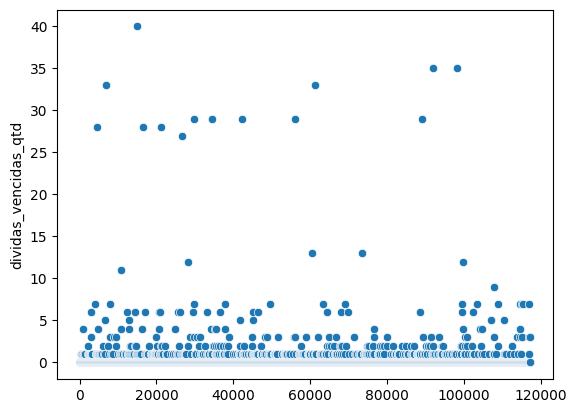

In [14]:
sns.scatterplot(x= df.index, y = "dividas_vencidas_qtd", data = df)
df[df["dividas_vencidas_qtd"]>= 25] # pelo scatterplot, é possível verificar que há poucas linhas cujo valor de dividas_vencidas_qtd é maior ou igual a 25 (outliers, pois os demais estão abaixo de 15)

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
4623,0,16.333333,11.000000,32526.06,0.00,1213059.58,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,26097.451627,10,2017,0
12654,0,22.750000,7.000000,12726.93,0.00,1098615.43,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,5750.518779,5,2017,0
13649,0,19.666667,11.333333,28683.17,3932.88,1107409.48,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,10202.130721,6,2017,0
13865,0,18.545455,16.250000,10482.71,0.00,1202576.87,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,2983.985919,9,2017,0
17802,0,14.944444,9.285714,73401.49,0.00,1215056.48,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,42 dias,107226.858154,10,2017,0
25522,0,28.000000,28.000000,12025.95,0.00,1091205.58,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,4006.679400,4,2017,0
33271,0,17.400000,14.000000,42634.99,0.00,1159941.88,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,10071.397089,8,2017,0
38781,0,58.000000,18.264130,20806.50,15286.81,2733344.86,684,1497707.0,0,0.0,...,0,2,empresa individual respons limitada empresaria,lucro real,com de maquinas e equip para escritorio,missing,2368.321417,11,2018,0
40488,0,14.941176,8.333333,58231.68,0.00,1215056.48,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,42 dias,5530.439473,10,2017,0
40686,0,7.000000,7.000000,15932.35,0.00,1084473.63,0,0.0,0,0.0,...,0,2,sociedade anonima fechada,lucro real,com de equipamentos de informatica,30 dias,4042.200527,4,2017,0


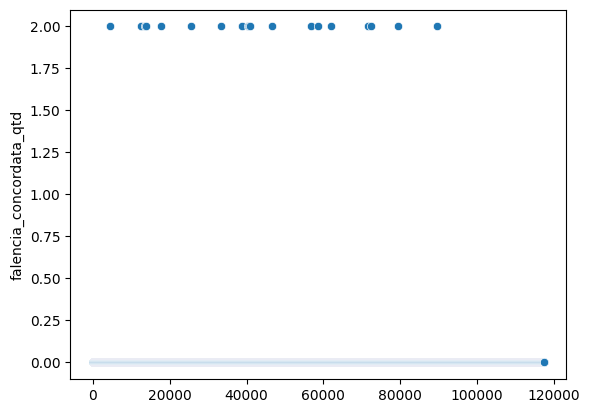

In [15]:
sns.scatterplot(x= df.index, y = "falencia_concordata_qtd", data = df)
df[df["falencia_concordata_qtd"] >= 2] # Observa-se que há poucas linhas em que falencia_concordata_qtd é igual a 2, assumin do esses valores como outliers

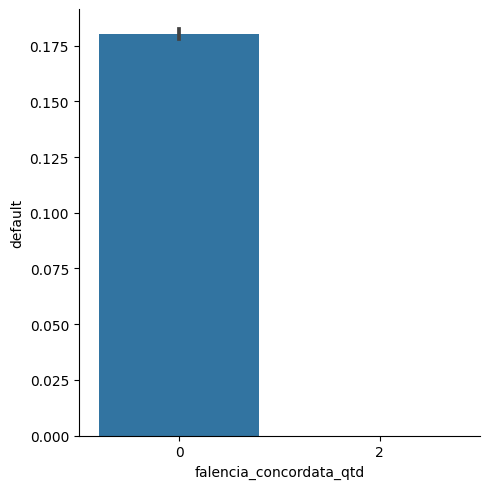

In [16]:
sns.catplot(x="falencia_concordata_qtd", y="default", data=df, kind="bar")

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
884,0,14.652174,1.000000,1410395.04,405705.41,1.666303e+08,0,0.0,2,51570.0,...,0,0,sociedade anonima fechada,lucro real,com de eletrodomesticos,30 dias,2.830038e+05,2,2019,0
1106,0,10.333333,17.498175,51066777.40,9336494.40,4.400353e+08,1,111750.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,farmacia e drogaria,120,5.121860e+05,9,2017,0
4421,0,101.000000,16.000000,28320117.69,2538135.56,2.873013e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,1.231850e+04,2,2019,0
4461,0,15.895833,30.000000,1622580.00,405705.41,1.666305e+08,0,0.0,2,51570.0,...,0,0,sociedade anonima fechada,lucro real,com de eletrodomesticos,30 dias,1.773925e+05,2,2019,0
4709,0,15.895833,30.000000,1622580.00,405705.41,1.666305e+08,0,0.0,2,51570.0,...,0,0,sociedade anonima fechada,lucro real,com de eletrodomesticos,30 dias,1.517776e+05,2,2019,0
6067,0,14.955556,3.000000,5519387.90,118148.82,1.538508e+08,0,0.0,2,51570.0,...,0,0,sociedade anonima fechada,lucro real,com de eletrodomesticos,30 dias,2.978772e+05,11,2018,0
16586,0,101.000000,16.000000,27748657.73,2047795.08,2.872908e+08,118,1390334.0,65,2553463.0,...,28,0,sociedade anonima fechada,lucro real,com de confeccoes em geral,missing,5.796520e+03,2,2019,0
16642,0,16.127660,28.666667,1410395.04,405705.41,1.666303e+08,0,0.0,2,51570.0,...,0,0,sociedade anonima fechada,lucro real,com de eletrodomesticos,30 dias,2.202565e+05,2,2019,0
17549,0,9.000000,9.000000,54427284.40,9336494.40,4.400353e+08,1,111750.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,farmacia e drogaria,120,2.363504e+06,9,2017,0
18458,0,14.652174,1.000000,1410395.04,405705.41,1.666303e+08,0,0.0,2,51570.0,...,0,0,sociedade anonima fechada,lucro real,com de eletrodomesticos,30 dias,1.429438e+05,2,2019,0


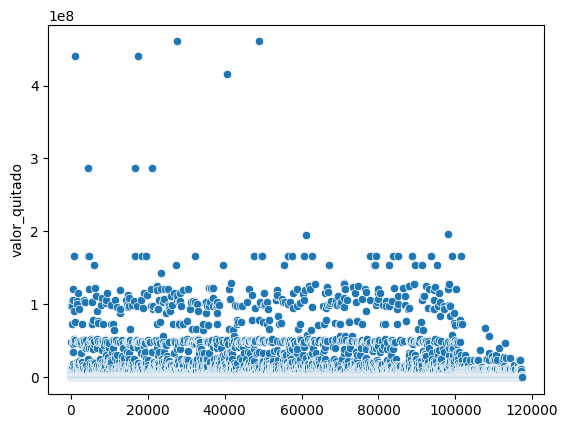

In [17]:
sns.scatterplot(x= df.index, y = "valor_quitado", data = df)
df[df["valor_quitado"] >= 150000000]

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
242,0,705.000000,17.972638,2413.370000,0.0,35608.040000,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,papelaria,28/42/56,7972.894039,8,2019,0
596,0,669.000000,18.239883,0.000000,0.0,49082.910000,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de equipamentos de informatica,28/42/56,3403.216051,1,2019,0
1325,0,702.000000,18.248850,0.000000,0.0,2040.420000,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,"com de prod- cine, foto, som, instr musicais",30/60/90,2660.372972,2,2019,0
1344,0,651.000000,18.248850,0.000000,0.0,4102.780000,0,0.0,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,"locacao de filmes, fitas de videogame e cd s",30/60/90,2832.656834,1,2019,0
4311,0,651.000000,9.651251,0.000000,0.0,2009.670000,0,0.0,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,"locacao de filmes, fitas de videogame e cd s",30/60/90,843.657390,4,2017,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109935,0,668.269358,18.189152,15660.403561,0.0,720246.109361,0,0.0,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,35/42/49,182473.579060,7,2019,1
111595,0,637.608016,13.969347,0.000000,0.0,0.000000,0,0.0,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,com de telefones e equip p/ comunicacoes,30/60/90,2837.038828,10,2017,1
112993,0,720.537695,19.800215,323.056372,0.0,479815.281353,0,0.0,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de equipamentos de informatica,missing,88543.780147,5,2019,1
115172,0,653.897586,18.096494,16.674119,0.0,1025.414629,0,0.0,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,com de eletrodomesticos,30/60/90,3417.681597,1,2019,1


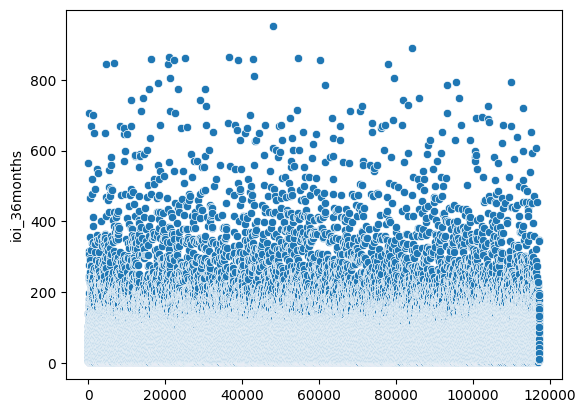

In [18]:
sns.scatterplot(x= df.index, y = "ioi_36months", data = df)
df[df["ioi_36months"] >= 600]

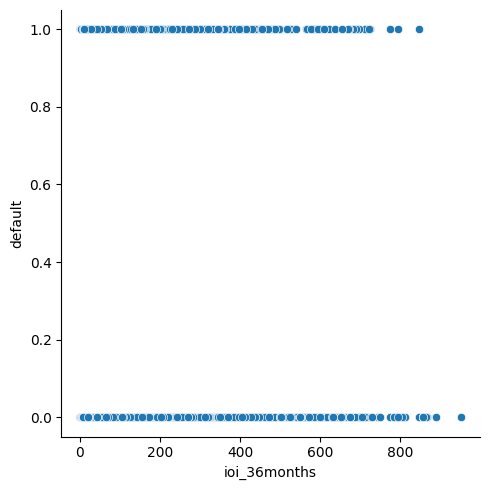

In [19]:
sns.relplot(data=df,x="ioi_36months",y="default")

In [20]:
### REMOVENDO OUTLIERS IDENTIFICADOS

df = df[(df["default_3months"] < 10) & (df["quant_protestos"] < 200) & (df["quant_acao_judicial"] < 10) & (df["dividas_vencidas_qtd"] < 25) & (df["falencia_concordata_qtd"] < 2) & (df["valor_quitado"]<100000000)]
df

,default_3months,ioi_36months,ioi_3months,valor_por_vencer,valor_vencido,valor_quitado,quant_protestos,valor_protestos,quant_acao_judicial,acao_judicial_valor,...,dividas_vencidas_qtd,falencia_concordata_qtd,tipo_sociedade,opcao_tributaria,atividade_principal,forma_pagamento,valor_total_pedido,month,year,default
0,0,58.000000,18.236092,0.000000,0.00,242100.700000,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,papelaria,30/60/90,34665.674938,6,2019,0
2,0,13.250000,3.904762,513043.830000,0.00,158631.930000,1,1800.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de vigilancia e guarda,missing,72653.621143,4,2018,0
3,0,136.925000,10.144219,23273.640000,0.00,669644.160000,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,com de equipamentos de informatica,missing,14576.805783,4,2017,1
4,0,140.333333,17.651678,0.000000,0.00,2010.560000,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de compon eletron e pecas para eletrod,30/60/90,2655.505663,10,2017,0
5,0,58.866667,10.000000,2026.490000,225.39,133983.630000,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de equipamentos de informatica,28 dias,2811.399759,9,2019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117268,0,32.679779,16.582511,10470.620143,0.00,540673.324711,0,0.000000,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,com de telefones e equip p/ comunicacoes,30/60/90,13290.156794,1,2019,1
117269,0,41.894875,16.649383,3349.884555,0.00,3373.145777,0,0.000000,0,0.0,...,0,0,empresario (individual),simples nacional,comercio,missing,4574.831977,4,2018,1
117270,0,132.525884,18.188413,893.233266,0.00,3362.163427,0,0.000000,0,0.0,...,0,0,empresario-mei(microempreendedor individual),simples nacional,com de moveis e estofados,missing,944.324251,1,2017,1
117271,0,26.930798,16.337212,43969.125732,0.00,13889.897554,2,622.546407,0,0.0,...,0,0,sociedade empresaria limitada,simples nacional,servicos de telefonia fixa,30/60/90/120,5295.273974,11,2019,1


In [21]:
abs(df["acao_judicial_valor"].corr(df["quant_acao_judicial"]))

0.3573665216892936

## Variáveis Categóricas

In [22]:
var_categoricas = ["tipo_sociedade", "opcao_tributaria", "atividade_principal", "forma_pagamento"]


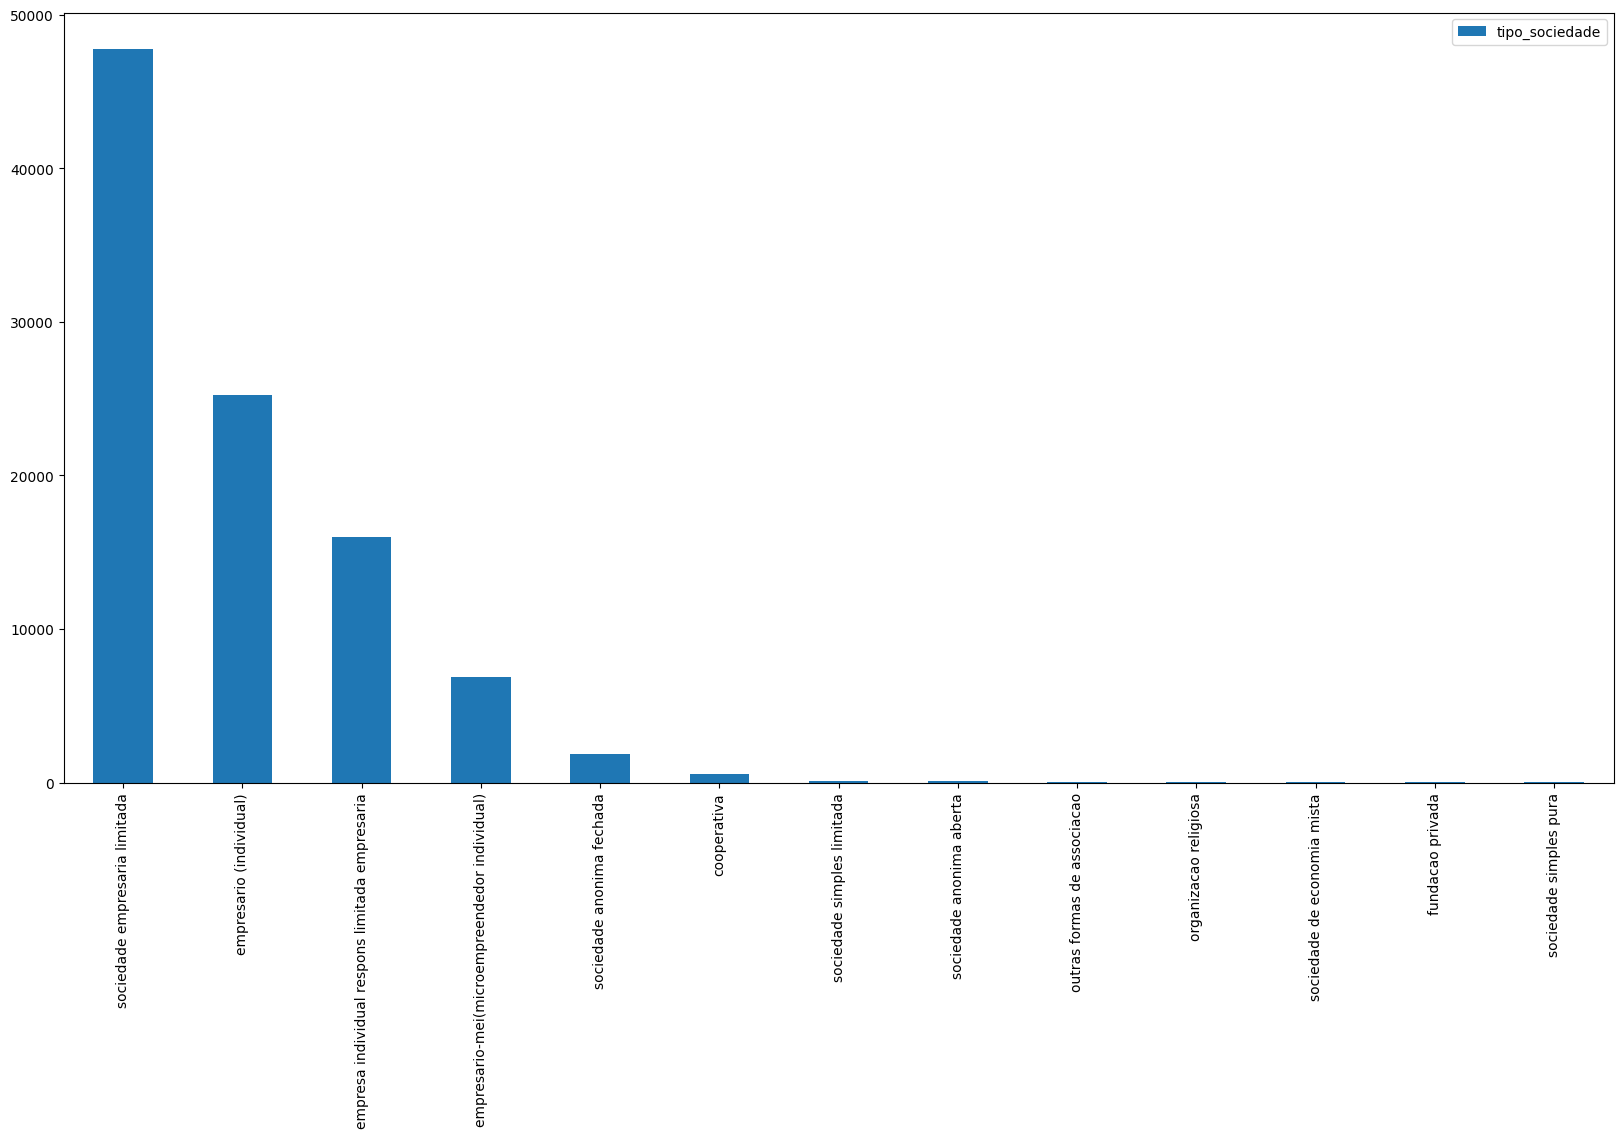

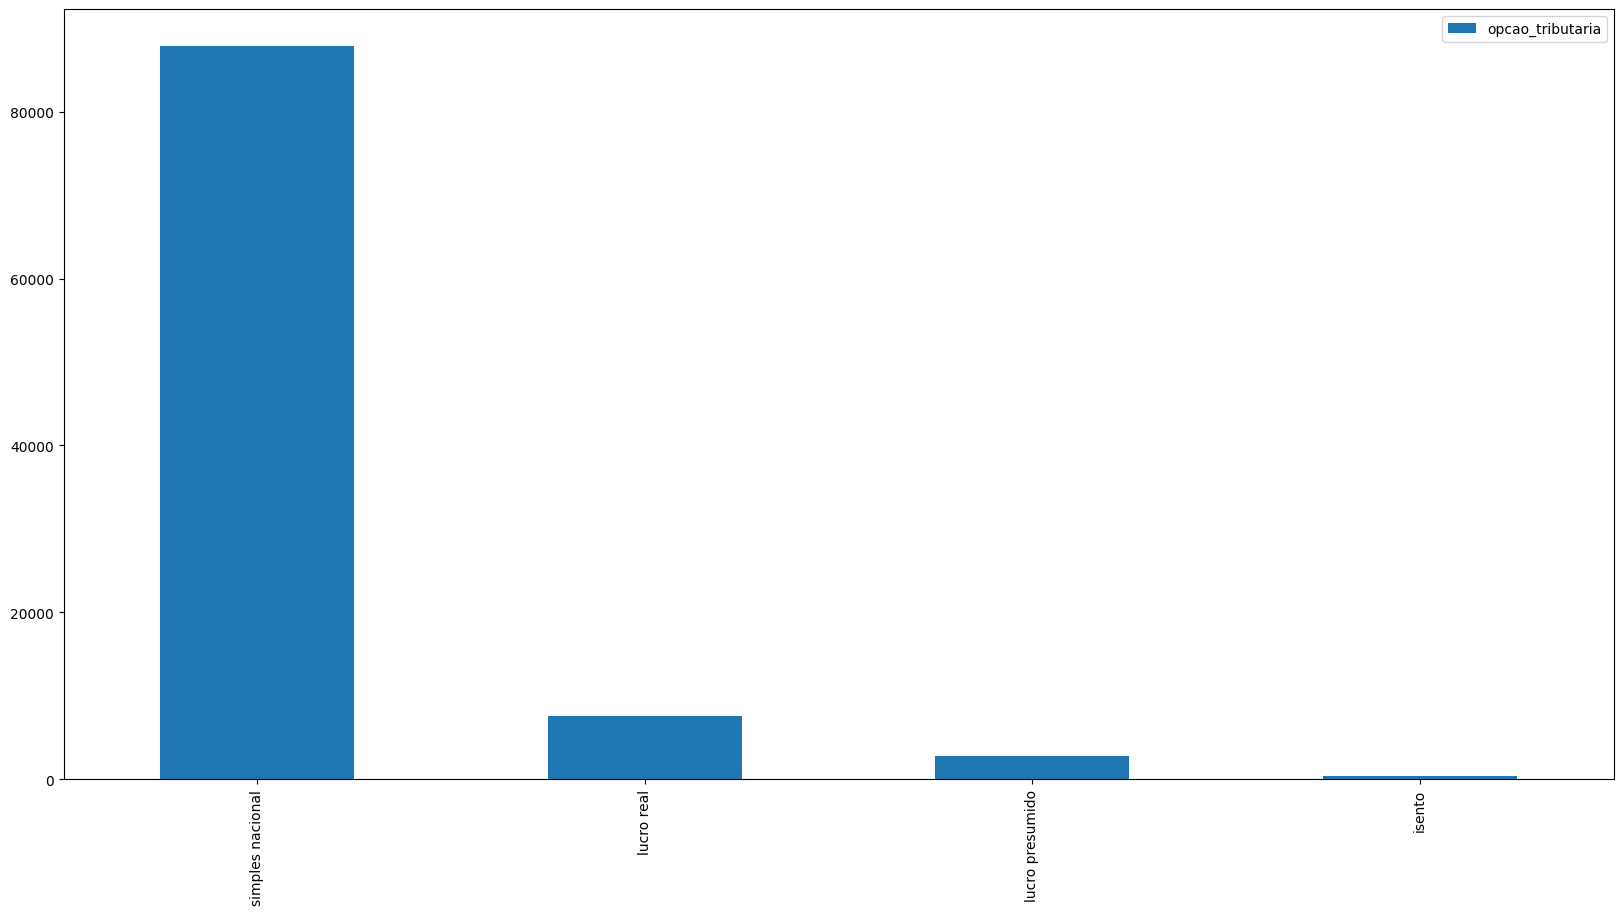

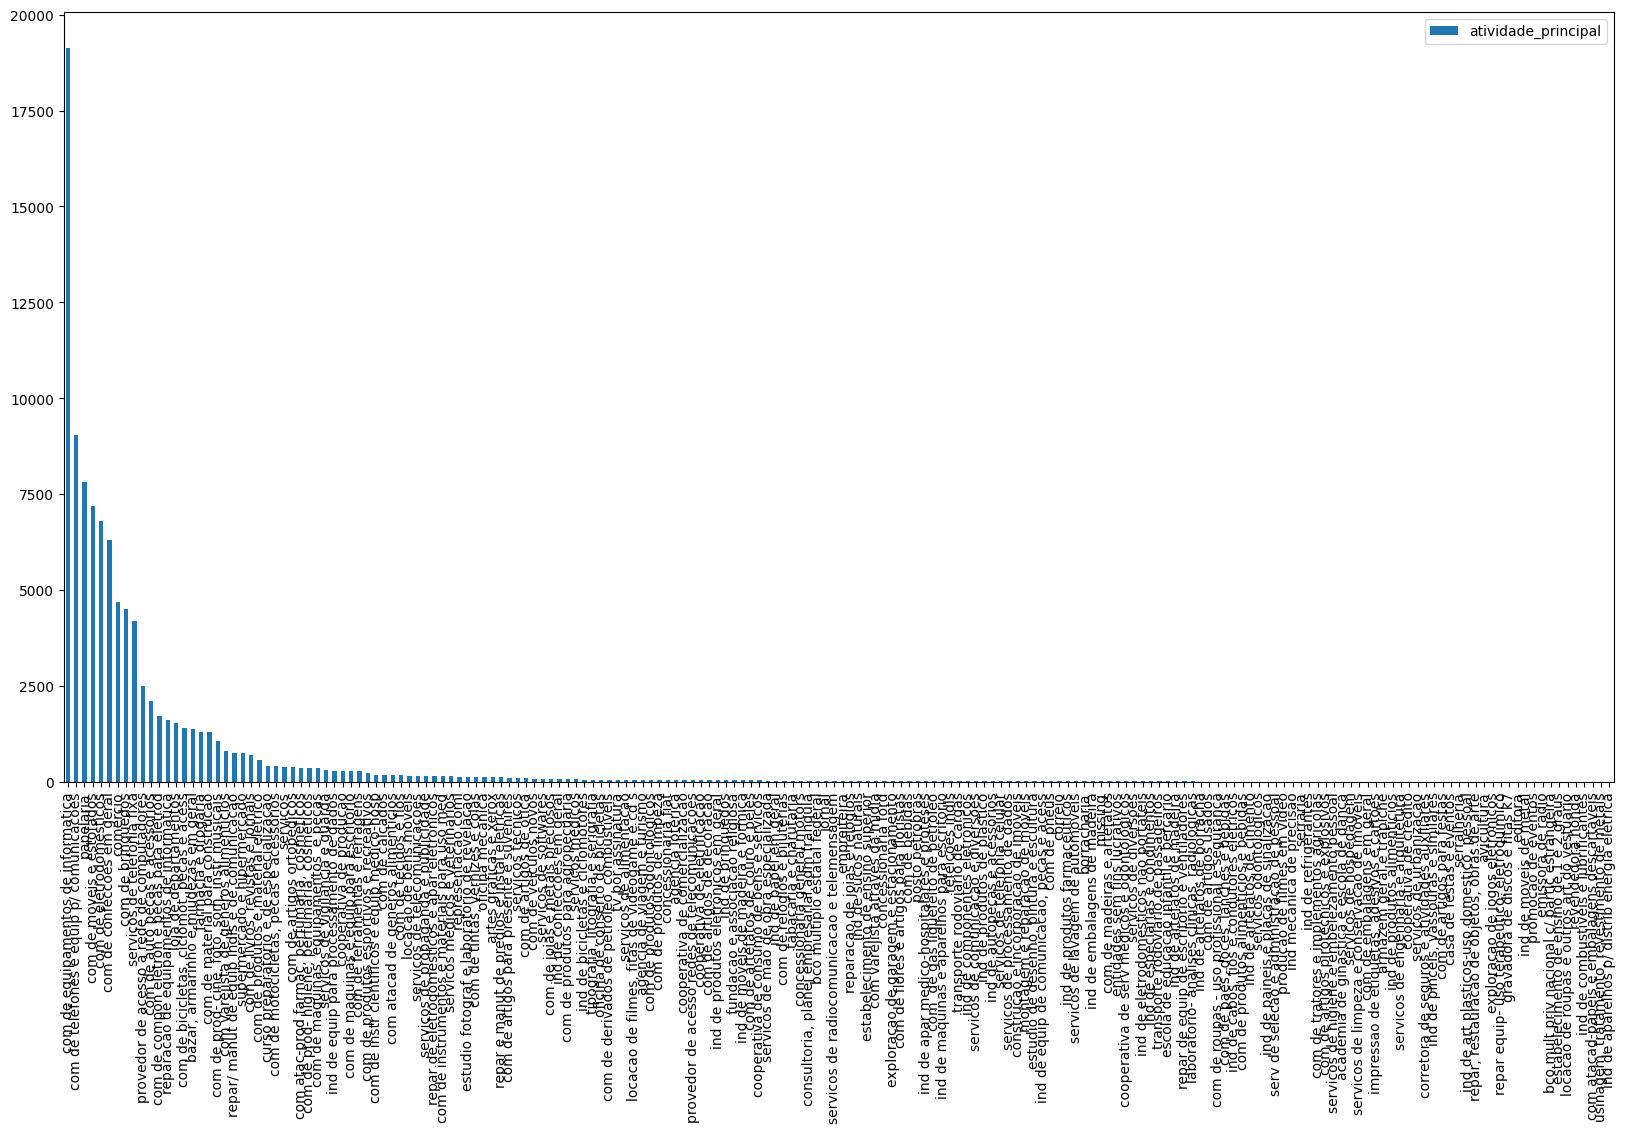

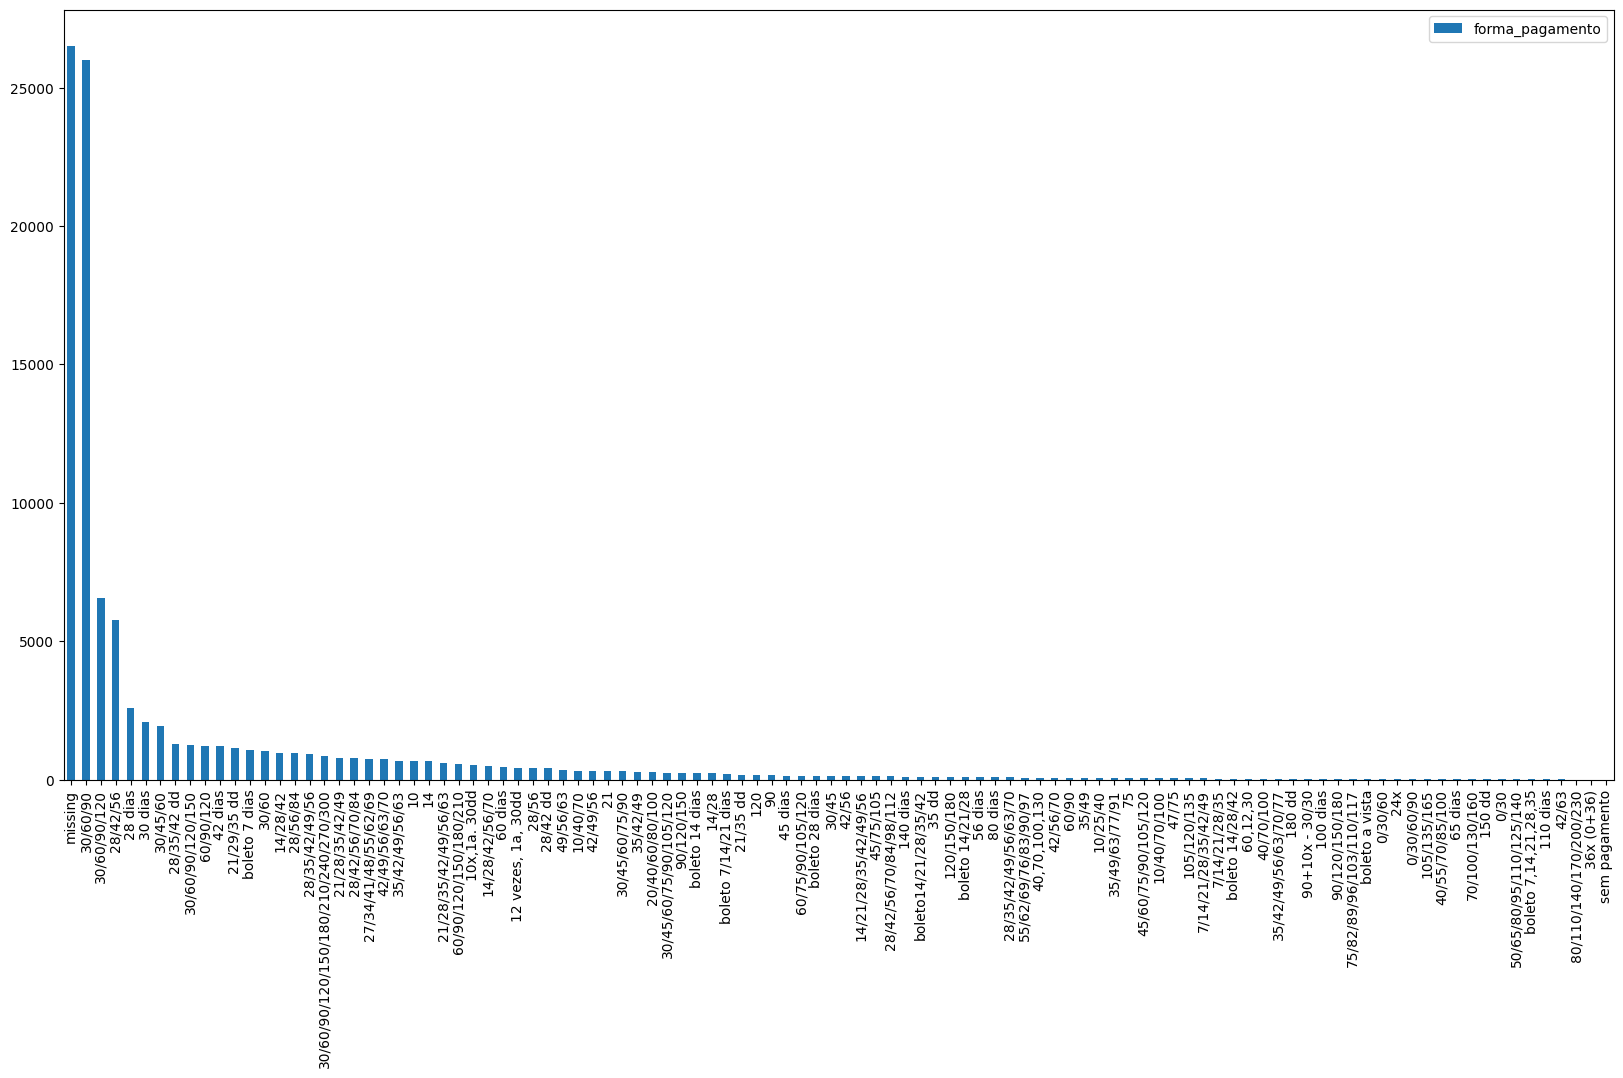

In [23]:
for var in var_categoricas:
    pd.DataFrame(df[var].value_counts()).plot(kind='bar', figsize=(20,10))
    
# as variáveis atividade_principal e forma_pagamento possuem uma quantidade excessiva de opções, o que pode ser prejudicial para o nosso modelo
# manteremos as variáveis categóricas tipo_sociedade e opcao_tributaria


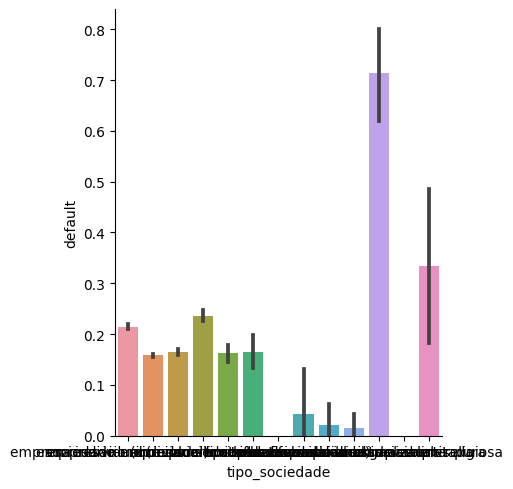

In [24]:
sns.catplot(y="default", x="tipo_sociedade", kind='bar',data=df)
#observa-se que certos tipos de sociedade têm uma tendencia maior a cometer calote, o que pode ser útil para o modelo

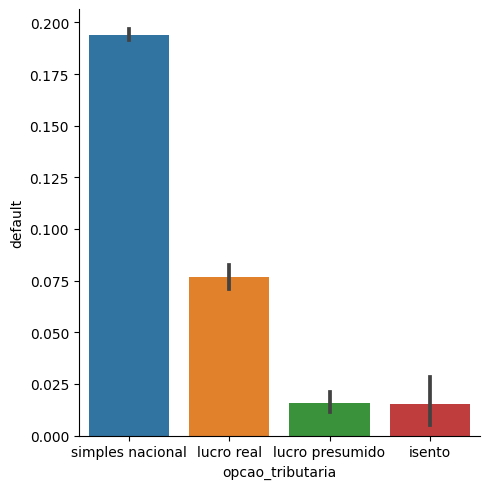

In [25]:
sns.catplot(y="default", x="opcao_tributaria", kind="bar", data=df)

- One Hot Encoding

Será realizado o one hot encoding para as variáveis categóricas mais relevantes para o modelo: opcao_tributaria e tipo_sociedade.

In [26]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

relevant_columns = ["opcao_tributaria", "tipo_sociedade"]

one_hot_enc = make_column_transformer(
    (OneHotEncoder(handle_unknown = 'ignore'),
    relevant_columns),
    remainder='passthrough')

df = one_hot_enc.fit_transform(df)
df = pd.DataFrame(df, columns=one_hot_enc.get_feature_names_out())
df

df.describe()

,onehotencoder__opcao_tributaria_isento,onehotencoder__opcao_tributaria_lucro presumido,onehotencoder__opcao_tributaria_lucro real,onehotencoder__opcao_tributaria_simples nacional,onehotencoder__tipo_sociedade_cooperativa,onehotencoder__tipo_sociedade_empresa individual respons limitada empresaria,onehotencoder__tipo_sociedade_empresario (individual),onehotencoder__tipo_sociedade_empresario-mei(microempreendedor individual),onehotencoder__tipo_sociedade_fundacao privada,onehotencoder__tipo_sociedade_organizacao religiosa,...,remainder__participacao_falencia_valor,remainder__dividas_vencidas_valor,remainder__dividas_vencidas_qtd,remainder__falencia_concordata_qtd,remainder__atividade_principal,remainder__forma_pagamento,remainder__valor_total_pedido,remainder__month,remainder__year,remainder__default
count,98554.0,98554.0,98554.0,98554.0,98554.0,98554.0,98554.0,98554.0,98554.0,98554.0,...,98554.0,98554.0,98554,98554,98554,98554,98554.000000,98554,98554,98554
unique,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,1.0,261.0,9,1,186,104,98554.000000,12,3,2
top,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0,0,com de equipamentos de informatica,missing,34665.674938,8,2018,0
freq,98163.0,95797.0,90994.0,87846.0,98027.0,82541.0,73330.0,91692.0,98531.0,98521.0,...,98554.0,97934.0,98008,98554,19121,26495,1.000000,11294,44441,80873


In [27]:
df.count()

onehotencoder__opcao_tributaria_isento                                          98554
onehotencoder__opcao_tributaria_lucro presumido                                 98554
onehotencoder__opcao_tributaria_lucro real                                      98554
onehotencoder__opcao_tributaria_simples nacional                                98554
onehotencoder__tipo_sociedade_cooperativa                                       98554
onehotencoder__tipo_sociedade_empresa individual respons limitada empresaria    98554
onehotencoder__tipo_sociedade_empresario (individual)                           98554
onehotencoder__tipo_sociedade_empresario-mei(microempreendedor individual)      98554
onehotencoder__tipo_sociedade_fundacao privada                                  98554
onehotencoder__tipo_sociedade_organizacao religiosa                             98554
onehotencoder__tipo_sociedade_outras formas de associacao                       98554
onehotencoder__tipo_sociedade_sociedade anonima aberta

## Criação dos datasets de treino/teste

In [28]:
from sklearn.model_selection import train_test_split

# removendo as colunas menos relevantes
df_train = df.drop(["remainder__valor_por_vencer", "remainder__atividade_principal", "remainder__forma_pagamento", "remainder__valor_vencido", "remainder__valor_quitado", "remainder__valor_protestos", "remainder__acao_judicial_valor", "remainder__participacao_falencia_valor", "remainder__dividas_vencidas_valor", "remainder__valor_total_pedido"], axis=1)

# o y contém apenas a coluna de interesse (verifica se houve ou não golpe default)
y = df_train.pop("remainder__default")
y= y.astype('int') # caso o dataset seja de tipo "object", o modelo de regressão logística não roda

df_train = df_train.astype('int')
x_train, x_test, y_train, y_test = train_test_split(df_train, y) # separa o dataset total em datasets de treinamento e validação

# métricas de avaliação para a escolha do melhor modelo
metrics = pd.DataFrame(columns=['Model', 'Accuracy', 'Recall'])


- Logistic Regression

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score


model = LogisticRegression(solver='liblinear', random_state=0).fit(x_train, y_train)

# utilizarei a validação cruzada k-fold em todos os modelos a fim de obter um desempenho mais robusto de cada modelo e para previnir overfitting
acc_scores = cross_val_score(model, x_test, y_test, cv=5, scoring='accuracy').mean()
rec_scores = cross_val_score(model, x_test, y_test, cv=5, scoring='recall').mean()
new_metrics = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy': [acc_scores], 'Recall': [rec_scores]})
metrics = pd.concat([metrics, new_metrics], ignore_index=True)
metrics

,Model,Accuracy,Recall
0,Logistic Regression,0.832014,0.097267


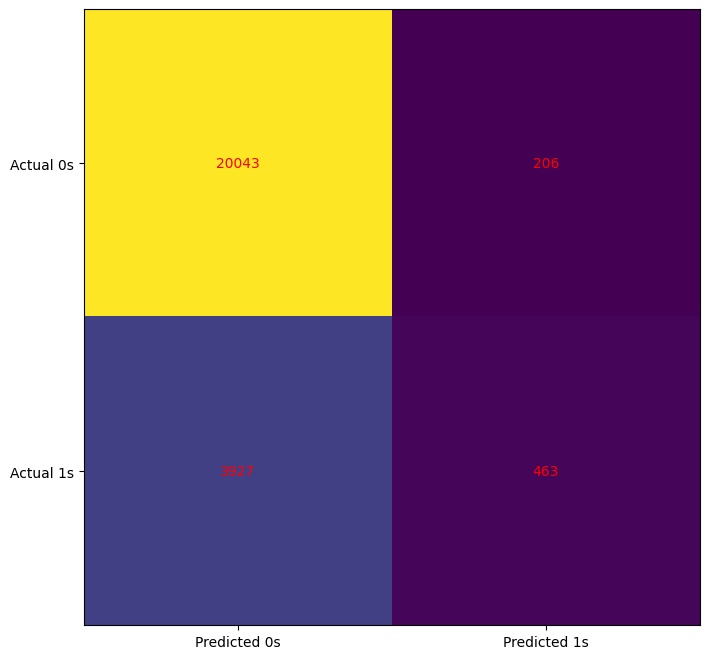

In [30]:
cm = confusion_matrix(y_test, model.predict(x_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)

for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

- K-Nearest-Neighbours (N=20)

In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Instancia nosso classificador
knn = KNeighborsClassifier(n_neighbors=20)
knn.fit(x_train,y_train)

# utilizarei a validação cruzada k-fold em todos os modelos a fim de obter um desempenho mais robusto de cada modelo e para previnir overfitting
acc_scores = cross_val_score(knn, x_test, y_test, cv = 5, scoring="accuracy").mean()
rec_scores = cross_val_score(knn, x_test, y_test, cv=5, scoring='recall').mean()
new_metrics = pd.DataFrame({'Model': ['KNN=20'], 'Accuracy': [acc_scores], 'Recall': [rec_scores]})
metrics = pd.concat([metrics, new_metrics], ignore_index=True)
metrics

,Model,Accuracy,Recall
0,Logistic Regression,0.832014,0.097267
1,KNN=20,0.826576,0.042369


- Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Instancia nosso classificador
rfc = RandomForestClassifier(random_state=42)
rfc.fit(x_train,y_train)

# utilizarei a validação cruzada k-fold em todos os modelos a fim de obter um desempenho mais robusto de cada modelo e para previnir overfitting

acc_scores = cross_val_score(rfc, x_test, y_test, cv = 5, scoring="accuracy").mean()
rec_scores = cross_val_score(rfc, x_test, y_test, cv=5, scoring='recall').mean()
new_metrics = pd.DataFrame({'Model': ['Random Forest'], 'Accuracy': [acc_scores], 'Recall': [rec_scores]})
metrics = pd.concat([metrics, new_metrics], ignore_index=True)
metrics

,Model,Accuracy,Recall
0,Logistic Regression,0.832014,0.097267
1,KNN=20,0.826576,0.042369
2,Random Forest,0.834896,0.376993


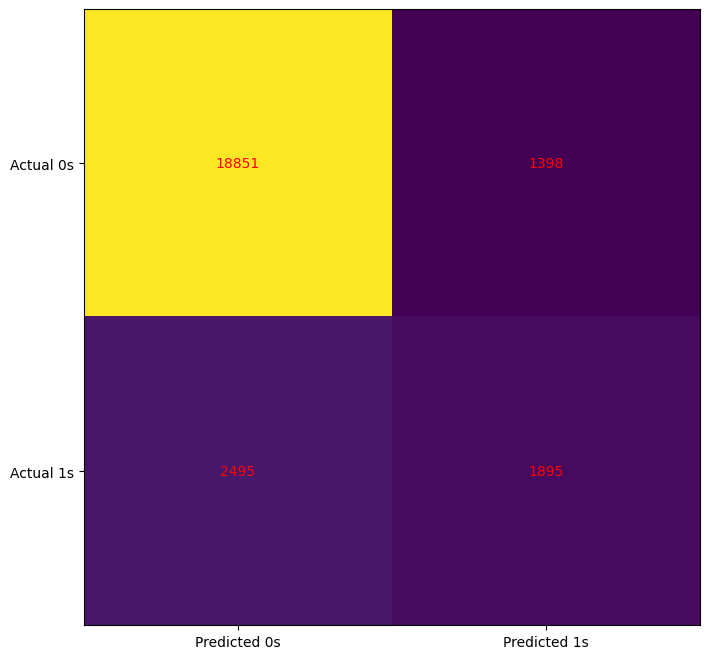

In [33]:
cm = confusion_matrix(y_test, rfc.predict(x_test))

# cria a imagem da matriz de confusão
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

- Extreme Gradient Boosting (XGBoost)

In [34]:
from xgboost import XGBClassifier

# Instancia nosso classificador
xgb = XGBClassifier(random_state=42)
xgb.fit(x_train,y_train)

# utilizarei a validação cruzada k-fold em todos os modelos a fim de obter um desempenho mais robusto de cada modelo e para previnir overfitting
acc_scores = cross_val_score(xgb, x_test, y_test, cv = 5, scoring="accuracy").mean()
rec_scores = cross_val_score(xgb, x_test, y_test, cv=5, scoring='recall').mean()
new_metrics = pd.DataFrame({'Model': ['XGB'], 'Accuracy': [acc_scores], 'Recall': [rec_scores]})
metrics = pd.concat([metrics, new_metrics], ignore_index=True)
metrics

,Model,Accuracy,Recall
0,Logistic Regression,0.832014,0.097267
1,KNN=20,0.826576,0.042369
2,Random Forest,0.834896,0.376993
3,XGB,0.858192,0.325513


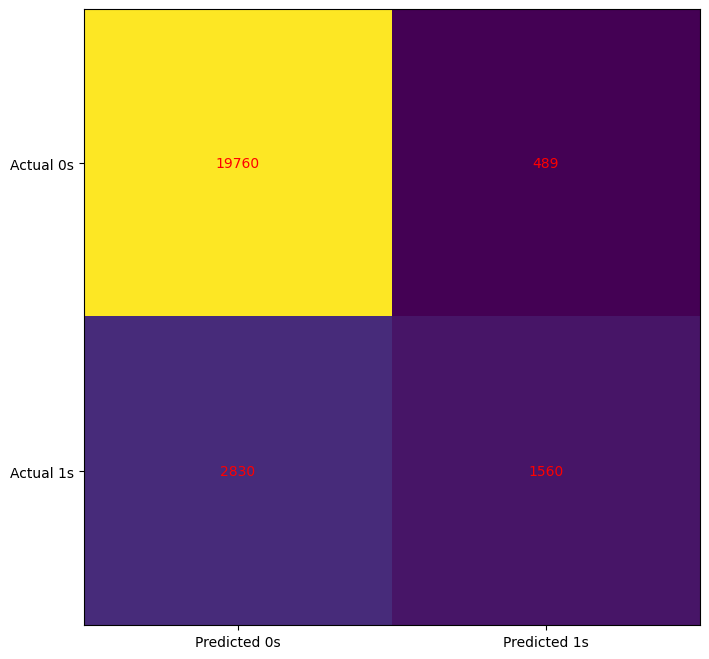

In [35]:
cm = confusion_matrix(y_test, xgb.predict(x_test))

# cria a imagem da matriz de confusão
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

- Multi-Layer Perceptron (Artificial Neural Network)

In [36]:
from sklearn.neural_network import MLPClassifier

# Instancia nosso classificador
mlp = MLPClassifier(random_state=42, early_stopping=True)
mlp.fit(x_train, y_train)

# utilizarei a validação cruzada k-fold em todos os modelos a fim de obter um desempenho mais robusto de cada modelo e para previnir overfitting
acc_scores = cross_val_score(mlp, x_test, y_test, cv = 5, scoring="accuracy").mean()
rec_scores = cross_val_score(mlp, x_test, y_test, cv=5, scoring='recall').mean()
new_metrics = pd.DataFrame({'Model': ['MLP'], 'Accuracy': [acc_scores], 'Recall': [rec_scores]})
metrics = pd.concat([metrics, new_metrics], ignore_index=True)
metrics

,Model,Accuracy,Recall
0,Logistic Regression,0.832014,0.097267
1,KNN=20,0.826576,0.042369
2,Random Forest,0.834896,0.376993
3,XGB,0.858192,0.325513
4,MLP,0.834531,0.146241


- Comparação entre os modelos

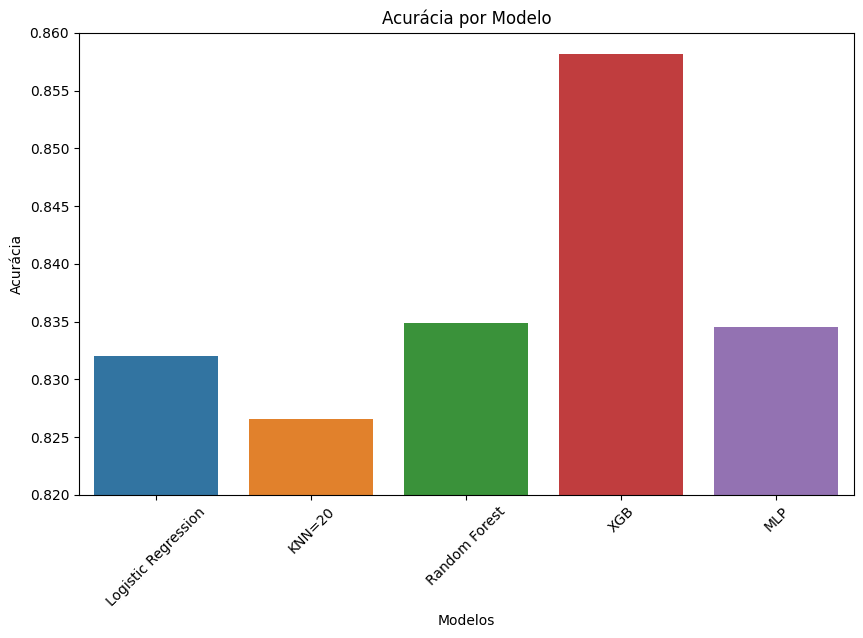

In [39]:
plt.figure(figsize=(10, 6))

metrics['Accuracy'] = pd.to_numeric(metrics['Accuracy'], errors='coerce')  # Convert to numeric, converting non-numeric values to NaN


# criando o barplot
sns.barplot(x="Model", y="Accuracy", data=metrics)

# eixos
plt.title("Acurácia por Modelo")
plt.xlabel("Modelos")
plt.ylabel("Acurácia")

# rotacionando o eixo x para melhorar a leitura
plt.xticks(rotation=45)
plt.ylim(0.82, 0.86)  # Example range


# Show the plot
plt.show()

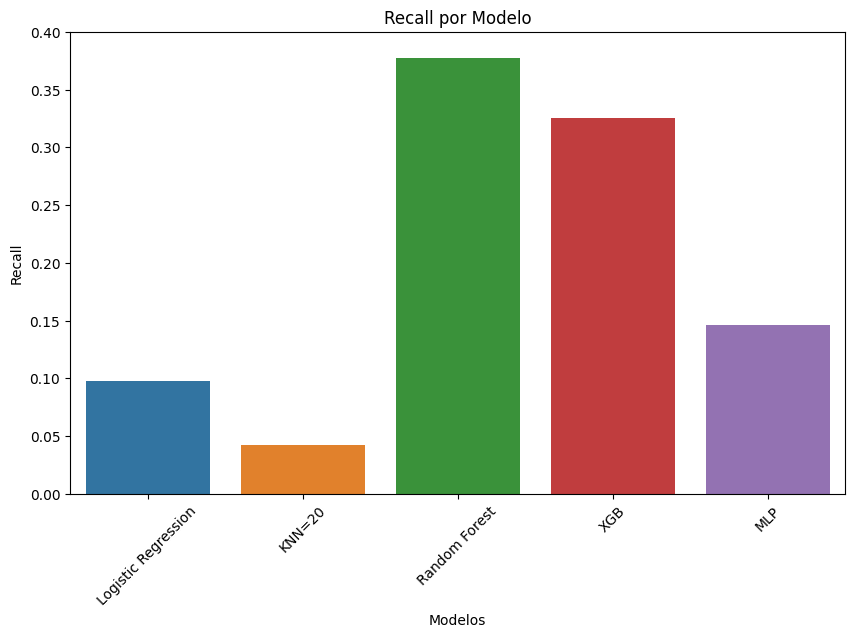

In [38]:
plt.figure(figsize=(10, 6))

metrics['Recall'] = pd.to_numeric(metrics['Recall'], errors='coerce')  # Convert to numeric, converting non-numeric values to NaN


# criando o barplot
sns.barplot(x="Model", y="Recall", data=metrics)

# eixos
plt.title("Recall por Modelo")
plt.xlabel("Modelos")
plt.ylabel("Recall")

# rotacionando o eixo x para melhorar a leitura
plt.xticks(rotation=45)
plt.ylim(0, 0.4)  # Example range


# Show the plot
plt.show()